### Importing Libraries

In [445]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline


### Reading File

In [362]:
df = pd.read_excel('Sample - Superstore.xls')

In [363]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Checking the Dataframe's information

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

### 

### Checking Null or NaN values

In [365]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [366]:
df['Country/Region'].nunique()

1

### Dropping Unecessary Columns

In [367]:
df.drop(columns = ['Country/Region'],inplace = True)

In [368]:
df.drop(columns = ['Row ID', 'Order ID'],inplace = True)

In [369]:
df.drop(columns = ['Postal Code'],inplace = True)

### Converting the Dates to pandas datetime

In [375]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [376]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

### Creating seperate Columns for Month Year and Profit Percentage 

In [377]:
df['month']=df['Order Date'].dt.month

In [378]:
df['year'] = df['Order Date'].dt.year

In [379]:
df['Profit Percentage'] = (df['Profit']/df['Sales']) * 100

### 

In [385]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year,Profit Percentage
0,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2019,16.00
1,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2019,30.00
2,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2019,47.00
3,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2018,-40.00
4,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2018,11.25


### Checking the number of Times a Product is ordered from each Category

<AxesSubplot:title={'center':'Number of times a product(s) from the Category is Ordered'}, ylabel='Category'>

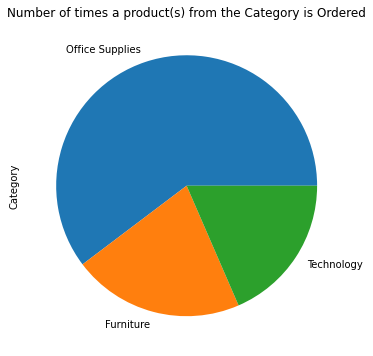

In [381]:
df['Category'].value_counts().plot(kind = 'pie', figsize = (12,6),title = 'Number of times a product(s) from the Category is Ordered')

Technology is lowest ordered category and Office Supplies are the highest

### 

### Checking the Sales from each Category

<AxesSubplot:title={'center':'Sales from the Category'}, ylabel='Sales'>

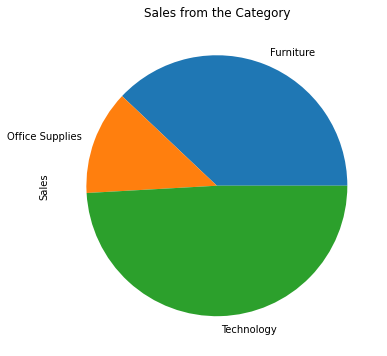

In [382]:
df.groupby('Category')['Sales'].mean().plot(kind = 'pie', figsize = (12,6),title = 'Sales from the Category')

But in terms of Sales Technology is highest and Office Supplies are at the bottom

### Checking the number of Times a Product is ordered from each Sub-Category

<AxesSubplot:title={'center':'Number of times a product(s) from the Category is Ordered'}, xlabel='Category'>

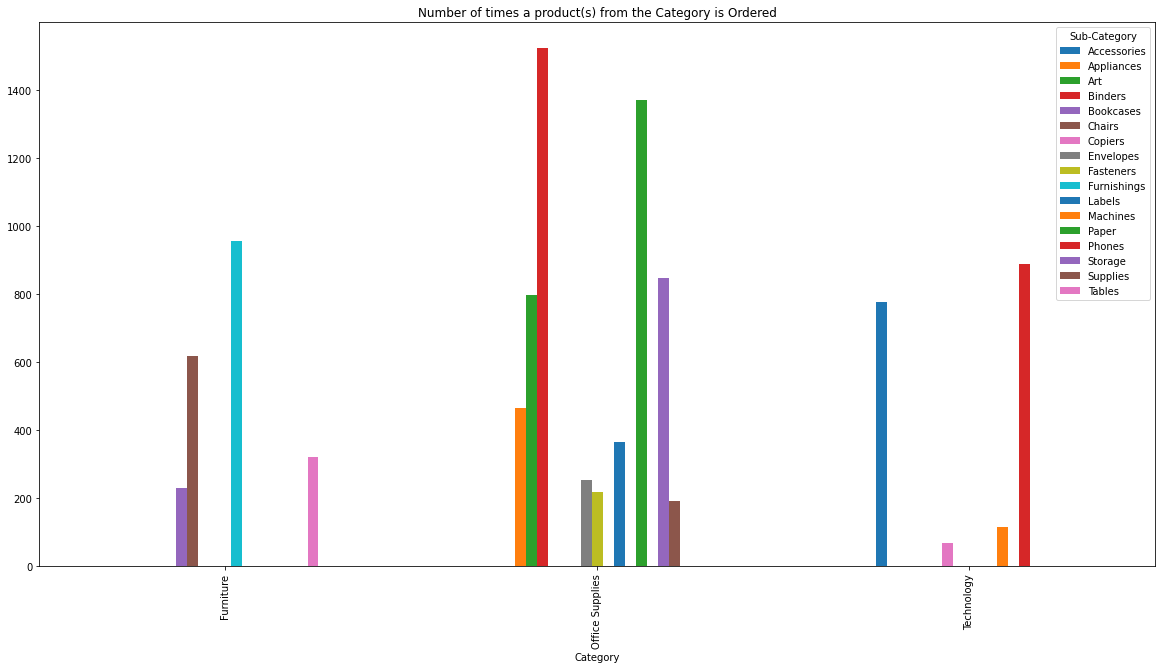

In [383]:
(df.groupby('Category')['Sub-Category'].value_counts()).unstack().plot(kind = 'bar', figsize = (20,10), title = 'Number of times a product(s) from the Category is Ordered')

### Checking the Sales from each Sub-Category

<AxesSubplot:title={'center':'Average Sales per Category'}, xlabel='Category'>

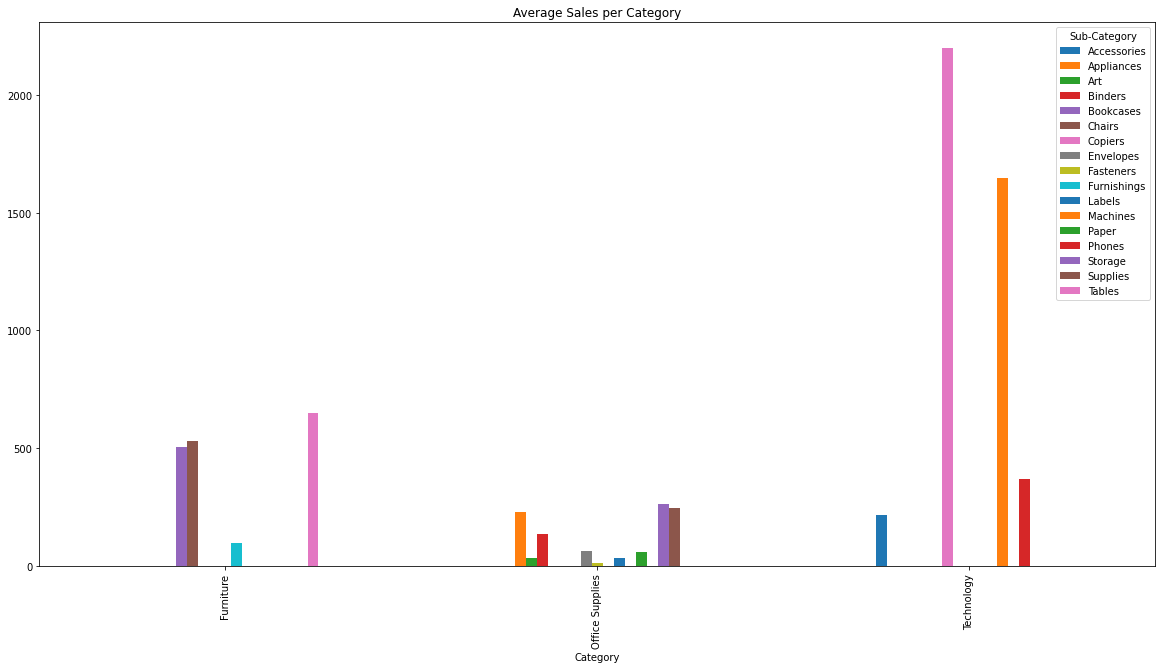

In [384]:
(df.groupby(['Category','Sub-Category'])['Sales'].mean()).unstack().plot(kind = 'bar', figsize = (20,10),title = 'Average Sales per Category')

### Visualizing the Trends of Sales average by Month and Year

<AxesSubplot:title={'center':'Monthly and Yearly Sales Average'}, xlabel='year,month', ylabel='Sales in Dollars'>

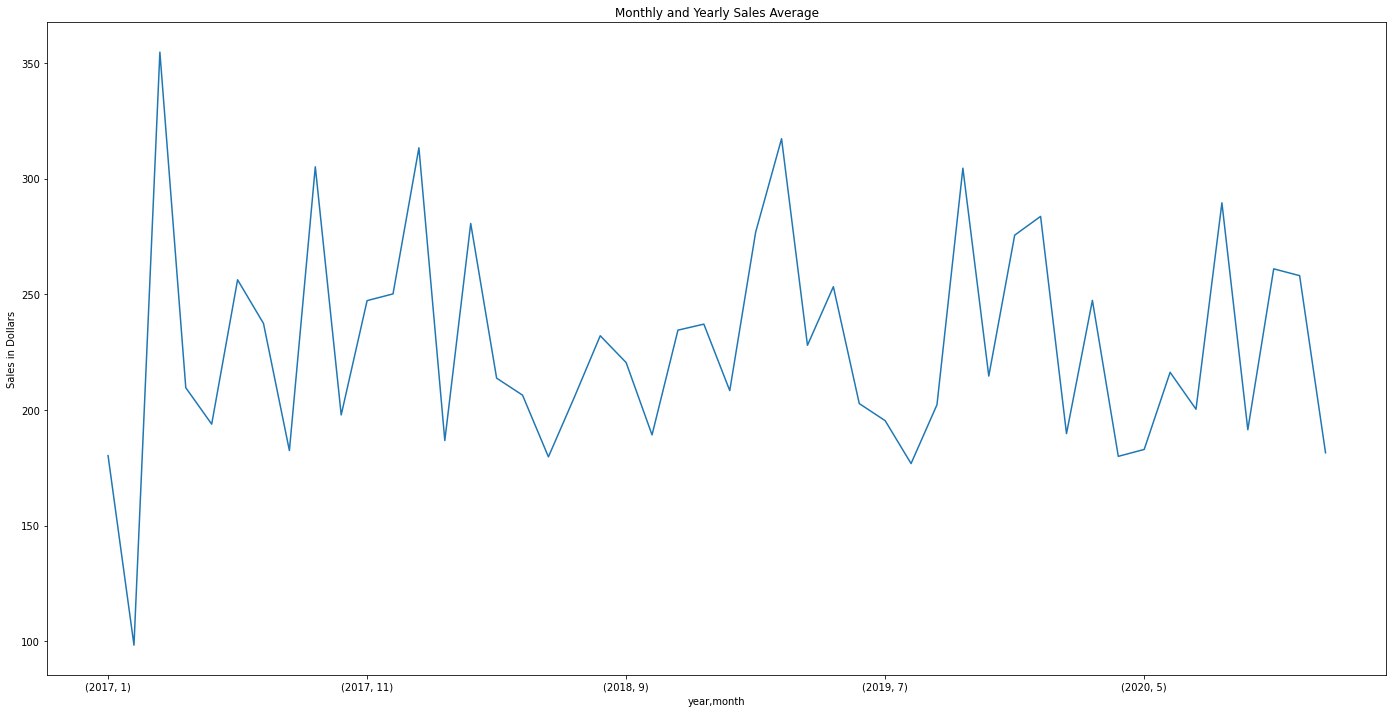

In [386]:
df.groupby(['year','month'])['Sales'].mean().plot(figsize = (24,12), title = 'Monthly and Yearly Sales Average',ylabel = 'Sales in Dollars')

### Visualizing the Trends of Profits average by Month and Year

<AxesSubplot:title={'center':'Monthly and Yearly Average Profits'}, xlabel='year,month', ylabel='Profit in Dollars'>

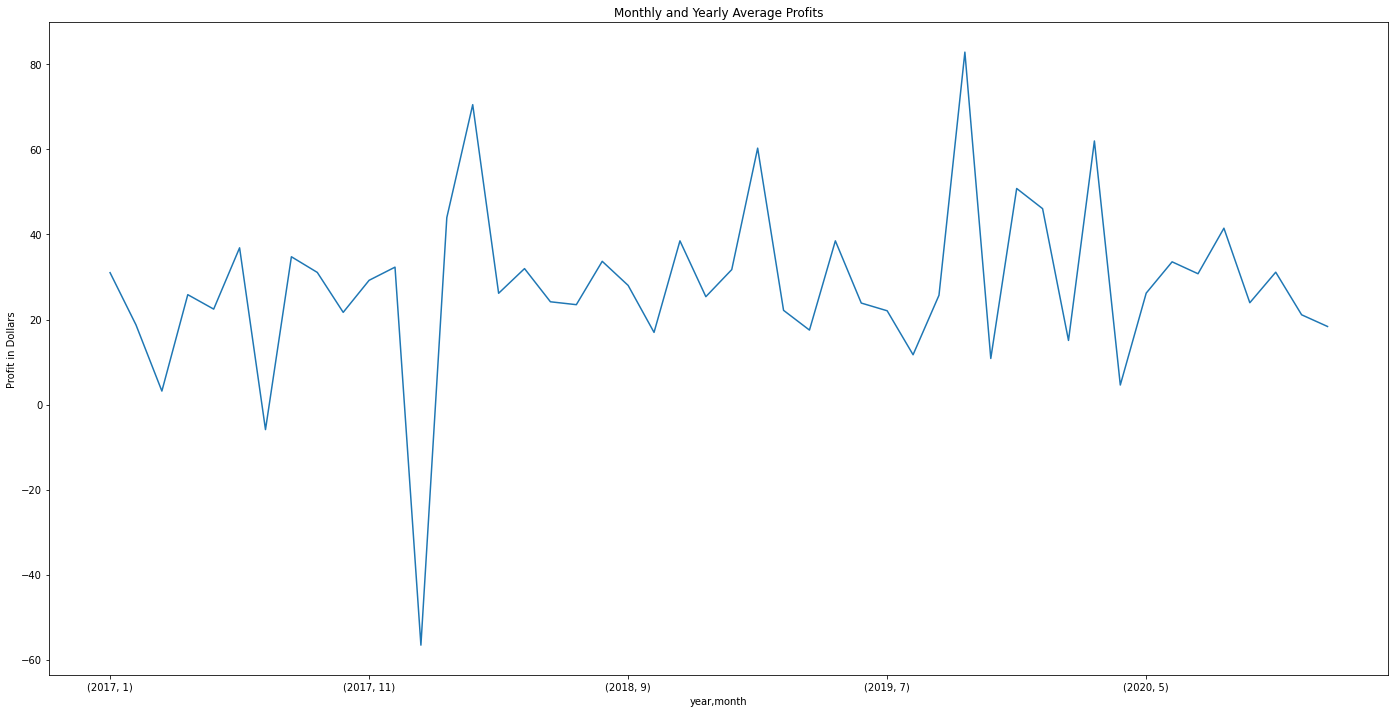

In [387]:
df.groupby(['year','month'])['Profit'].mean().plot(figsize = (24,12), title = 'Monthly and Yearly Average Profits',ylabel = 'Profit in Dollars')

We see no direct correlation with Sales and Profit

### 

### Plotting the Sales and Profits by Category

<AxesSubplot:title={'center':'Sales by Category'}, xlabel='Category', ylabel='Sales in Dollars'>

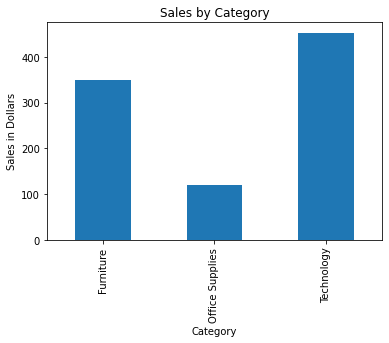

In [388]:
df.groupby('Category')['Sales'].mean().plot(kind = 'bar', title = 'Sales by Category',ylabel = 'Sales in Dollars')

<AxesSubplot:title={'center':'Profit by Category'}, xlabel='Category', ylabel='Profit in Dollars'>

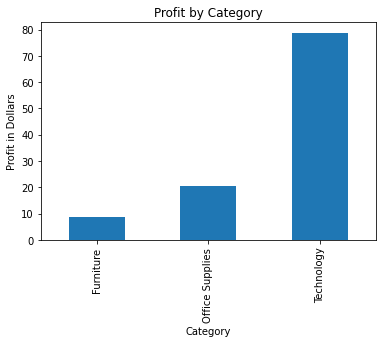

In [389]:
df.groupby('Category')['Profit'].mean().plot(kind = 'bar',title = 'Profit by Category',ylabel = 'Profit in Dollars')

Furniture Category has a high sales record but poor showing in terms of Profit

### 

### Creating a function to plot the respective sales of Subcategories in each Category

In [390]:
def func():
    for c in df['Category'].unique():
        df[df['Category'] == c].groupby(['Category','Sub-Category'])['Sales'].mean().sort_values(ascending = False).plot(kind = 'bar', ylabel = 'Sales in Dollars' ,subplots = True)
        plt.show()
    


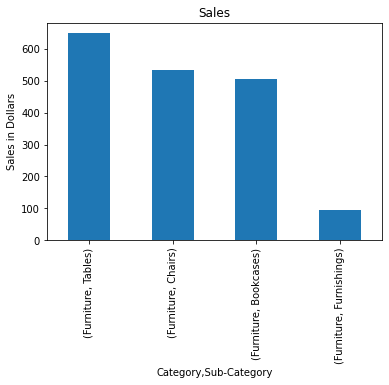

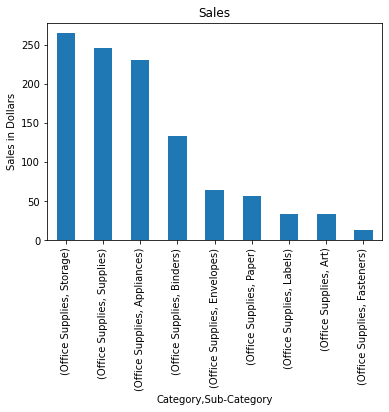

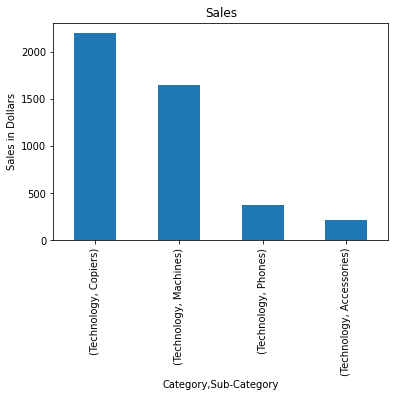

In [391]:
func()

### Creating a function to plot the respective Profits of Subcategories in each Category

In [392]:
def func2():
    for c in df['Category'].unique():
        f = df[df['Category'] == c].groupby(['Category','Sub-Category'])['Profit'].mean().sort_values(ascending = False)
        f.plot(kind = 'bar', ylabel = 'Profit in Dollars', color = (f > 0).map({True : 'b', False: 'r'}), subplots = True)
        plt.show()
    


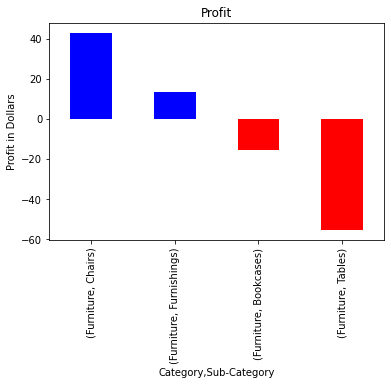

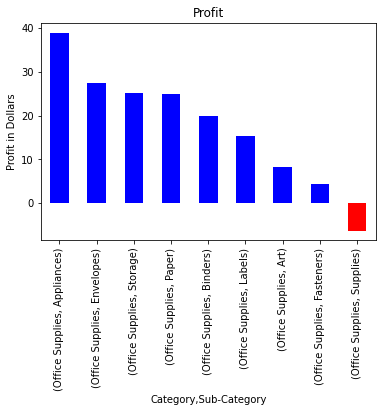

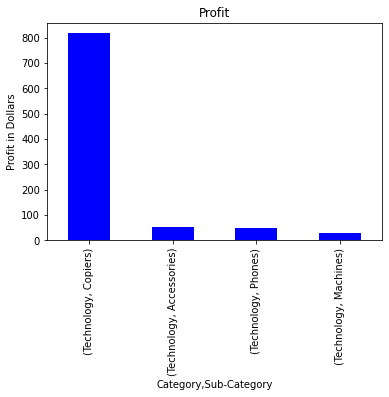

In [393]:
func2()

### Sorting the Sub-Categories in terms of Profits

In [459]:
df.groupby(['Sub-Category'], as_index = False)['Profit'].mean().sort_values(by ='Profit').head(16)

,Sub-Category,Profit
16,Tables,-55.565771
4,Bookcases,-15.230509
15,Supplies,-6.258418
8,Fasteners,4.375660
2,Art,8.200737
9,Furnishings,13.645918
10,Labels,15.236962
3,Binders,19.843574
12,Paper,24.856620
14,Storage,25.152277


Tables has the lowest performance in terms of Profits 

### Finding the number of times a Product has been ordered by Customer Segment

In [394]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

### Plotting a bar chart to show the respective sales of each Customer Segment

<AxesSubplot:title={'center':'Sales per Segment'}, xlabel='Segment', ylabel='Sales in Dollars'>

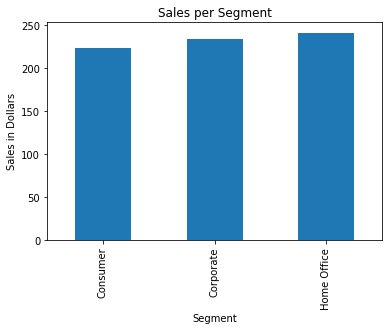

In [427]:
df.groupby('Segment')['Sales'].mean().plot(kind = 'bar', title = 'Sales per Segment', ylabel = 'Sales in Dollars')

### Plotting a bar chart to show the respective Profits of each Customer Segment

<AxesSubplot:title={'center':'Profit per Segment'}, xlabel='Segment', ylabel='Profits in Dollars'>

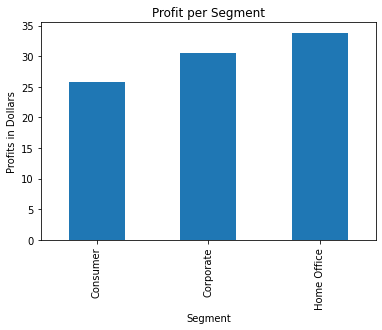

In [426]:
df.groupby('Segment')['Profit'].mean().plot(kind = 'bar', title = 'Profit per Segment', ylabel ='Profits in Dollars')

### Plotting a line plot to show the respective Sales of each Customer Segment by Month, Year

<AxesSubplot:xlabel='year'>

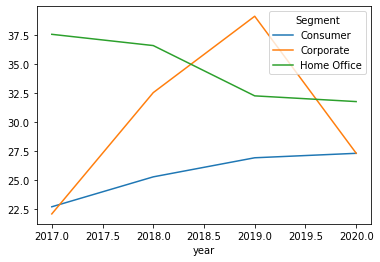

In [403]:
df.groupby(['year','Segment'])['Profit'].mean().unstack().plot()

### Finding the 30 most profitable Products

In [419]:
df.groupby(['Product Name'], as_index = False)['Profit'].mean().sort_values(by = 'Profit', ascending = False).head(30)

,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,5039.985600
405,Canon imageCLASS MF7460 Monochrome Digital Las...,1995.990000
165,Ativa V4110MDD Micro-Cut Shredder,1886.473050
19,"3D Systems Cube Printer, 2nd Generation, Magenta",1858.985700
1839,Zebra ZM400 Thermal Label Printer,1671.768000
811,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,1668.205000
806,Hewlett-Packard Deskjet 3050a All-in-One Color...,1459.200000
786,HP Designjet T520 Inkjet Large Format Printer ...,1364.992200
400,Canon PC1060 Personal Laser Copier,1142.733675
894,Ibico EPK-21 Electric Binding System,1115.094100


### Finding the 30 least profitable Products

In [405]:
b = df.groupby(['Product Name'], as_index = False)['Profit'].mean().sort_values(by = 'Profit').head(30)

In [406]:
b

,Product Name,Profit
476,Cubify CubeX 3D Printer Triple Head Print,-3839.990400
475,Cubify CubeX 3D Printer Double Head Print,-2959.990133
444,Cisco TelePresence System EX90 Videoconferenci...,-1811.078400
984,Lexmark MX611dhe Monochrome Laser Printer,-1147.493250
1837,Zebra GK420t Direct Thermal/Thermal Transfer P...,-938.280000
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-575.223120
602,Epson TM-T88V Direct Thermal Printer - Monochr...,-528.615000
364,BoxOffice By Design Rectangular and Half-Moon ...,-382.812500
969,LG G2,-374.992500
372,"Brother MFC-9340CDW LED All-In-One Printer, Co...",-319.191600


### Finding the 30 Products with the lowest Profit Margin

In [420]:
a = df.groupby(['Product Name'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage').head(30)

In [421]:
a

,Product Name,Profit Percentage
604,Eureka Disposable Bags for Sanitaire Vibra Gro...,-275.000000
388,"Bush Westfield Collection Bookcases, Dark Cher...",-210.000000
612,Euro Pro Shark Stick Mini Vacuum,-177.500000
17,3.6 Cubic Foot Counter Height Office Refrigerator,-148.400000
1214,Okidata B401 Printer,-140.000000
1837,Zebra GK420t Direct Thermal/Thermal Transfer P...,-133.333333
861,Hoover Commercial Lightweight Upright Vacuum,-131.250000
947,Kensington 6 Outlet SmartSocket Surge Protector,-125.000000
50,Acco 6 Outlet Guardian Basic Surge Suppressor,-116.000000
51,Acco 6 Outlet Guardian Premium Plus Surge Supp...,-113.000000


### Finding the Products with the highest Profit Margin

In [422]:
df.groupby(['Product Name'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage' ,ascending = False).head(15)

,Product Name,Profit Percentage
1672,Xerox 1890,50.0
1473,Southworth Structures Collection,50.0
109,Adams Telephone Message Book w/Frequently-Call...,50.0
1566,Tops Green Bar Computer Printout Paper,50.0
181,Avery 475,50.0
405,Canon imageCLASS MF7460 Monochrome Digital Las...,50.0
1757,Xerox 1969,49.0
1777,Xerox 1987,49.0
208,Avery 5,49.0
1702,Xerox 1918,49.0


### The mean Sales per each Region

<AxesSubplot:title={'center':'Sales per Region'}, xlabel='Region'>

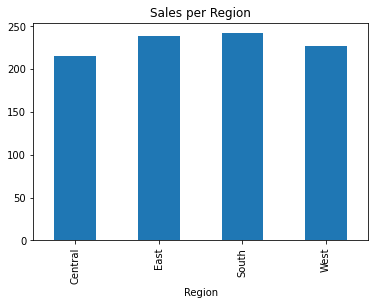

In [429]:
df.groupby(['Region'])['Sales'].mean().plot(kind = 'bar', title= 'Sales per Region')

### The mean Profit per each Region

<AxesSubplot:title={'center':'Profit per Region'}, xlabel='Region'>

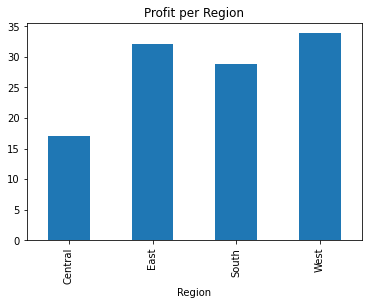

In [430]:
df.groupby(['Region'])['Profit'].mean().plot(kind = 'bar', title = 'Profit per Region')

Central has almost similar mean Sales with the other regions but has very little profit to show for it 

### Sales mean by Region in terms of Years

<AxesSubplot:title={'center':'Sales per Year'}, xlabel='year'>

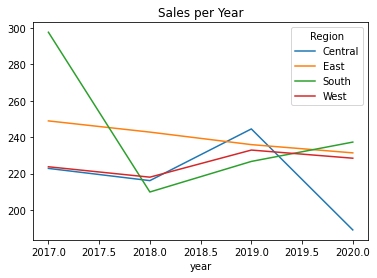

In [431]:
df.groupby(['year','Region'])['Sales'].mean().unstack().plot(title= 'Sales per Year')

### Profit mean by Region in terms of Years

<AxesSubplot:title={'center':'Profit per Year'}, xlabel='year'>

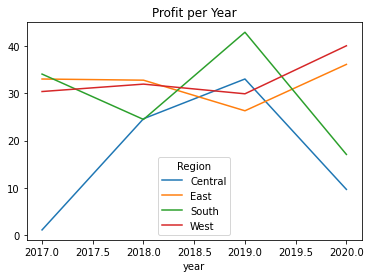

In [432]:
df.groupby(['year','Region'])['Profit'].mean().unstack().plot(title= 'Profit per Year')

### Ranking the 10 least Profitable States

<AxesSubplot:title={'center':'States with the lowest Profits'}, xlabel='State'>

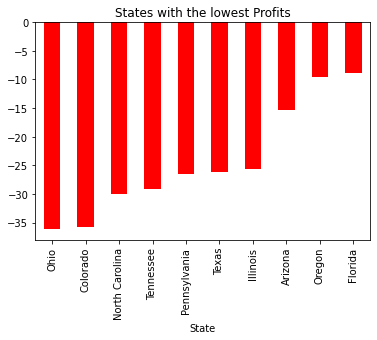

In [442]:
df.groupby(['State'])['Profit'].mean().sort_values().head(10).plot(kind = 'bar', title = 'States with the lowest Profits', color = 'r')

### Ranking the 10 most Profitable States

<AxesSubplot:title={'center':'States with the highest Profits'}, xlabel='State'>

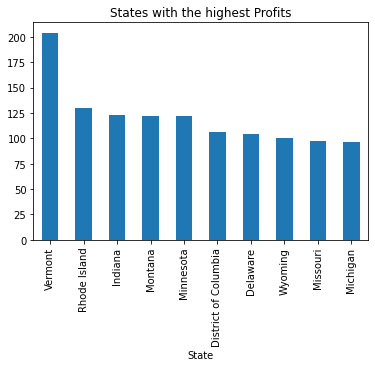

In [434]:
df.groupby(['State'])['Profit'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar',title = 'States with the highest Profits')

### Creating a new Dataframe 'd' with the same entries as the Original Dataframe minus the 30 least performing Products, the 30 products with the lowest Profit Margins and the Sub-Category of Tables

In [435]:
for c in a.index:
    
    d = df.drop(df[df['Product Name'] == c].index)

In [436]:
for c in b['Product Name']:
    
    d = d.drop(d[d['Product Name'] == c].index)

In [437]:
d.drop(d[d['Sub-Category']== 'Tables'].index, inplace = True)

The purpose is to compare the profits of this new Dataframe with that of the original

### 

In [439]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9618 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Date         9618 non-null   datetime64[ns]
 1   Ship Date          9618 non-null   datetime64[ns]
 2   Ship Mode          9618 non-null   object        
 3   Customer ID        9618 non-null   object        
 4   Customer Name      9618 non-null   object        
 5   Segment            9618 non-null   object        
 6   City               9618 non-null   object        
 7   State              9618 non-null   object        
 8   Region             9618 non-null   object        
 9   Product ID         9618 non-null   object        
 10  Category           9618 non-null   object        
 11  Sub-Category       9618 non-null   object        
 12  Product Name       9618 non-null   object        
 13  Sales              9618 non-null   float64       
 14  Quantity

### Checking sum of Profit of the old Dataframe and then the new Dataframe

In [259]:
df['Profit'].sum()

286397.0216999999

In [258]:
d['Profit'].sum()

334970.97439999995

 A difference of roughly $50000 in Profit over the last 4 years could be observed.

### Checking mean of Profit of the old Dataframe and then the new Dataframe

In [288]:
d['Profit'].mean()

34.849248272992085

In [289]:
df['Profit'].mean()

28.656896307784663

### 

### A barchart depicting the yearly profits for the old Dataframe

<AxesSubplot:title={'center':'Profits by year'}, xlabel='year'>

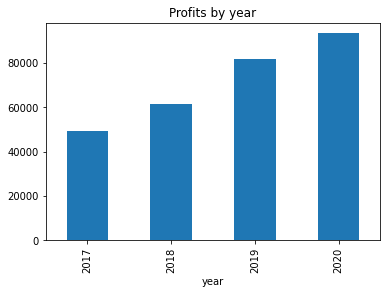

In [456]:
df.groupby('year')['Profit'].sum().plot(kind = 'bar', title = 'Profits by year')


### A barchart depicting the yearly profits for the new Dataframe

<AxesSubplot:title={'center':'Profits by year'}, xlabel='year'>

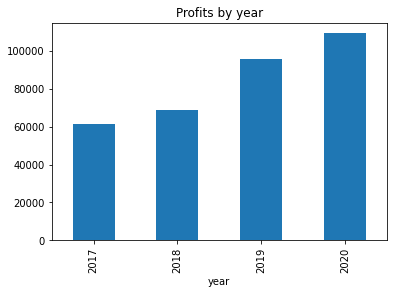

In [457]:
d.groupby('year')['Profit'].sum().plot(kind = 'bar',title = 'Profits by year')

### 

### 